## Vehicle Fuel Consumption Prediction

In [173]:
import numpy as np
import pandas as pd
import sys
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


import seaborn as sns

%matplotlib inline

#### Importing the dataset into a dataframe

In [129]:
df=pd.read_csv('./dataset/dataset.csv')
df.head()

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.6,8.3,10.1,28,232,6.2,6.2
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,11.0,8.3,9.8,29,225,6.2,6.2
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,8.3,9.7,29,223,6.2,6.2
3,1995,ACURA,LEGEND,COMPACT,3.2,6,A4,Z,14.2,10.5,12.5,23,288,6.2,6.2
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6,A4,Z,14.6,11.0,13.0,22,299,6.2,6.2


In [130]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)], inplace=True, axis=1)
df.head()

,MODEL YEAR,MAKE,MODEL(# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.6,8.3,10.1,28,232,6.2,6.2
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,11.0,8.3,9.8,29,225,6.2,6.2
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,8.3,9.7,29,223,6.2,6.2
3,1995,ACURA,LEGEND,COMPACT,3.2,6,A4,Z,14.2,10.5,12.5,23,288,6.2,6.2
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6,A4,Z,14.6,11.0,13.0,22,299,6.2,6.2


#### Dataframe summary

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26075 entries, 0 to 26074
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MODEL YEAR                     26075 non-null  int64  
 1   MAKE                           26075 non-null  object 
 2   MODEL(# = high output engine)  26075 non-null  object 
 3   VEHICLE CLASS                  26075 non-null  object 
 4   ENGINE SIZE (L)                26075 non-null  float64
 5   CYLINDERS                      26075 non-null  int64  
 6   TRANSMISSION                   26075 non-null  object 
 7   FUEL TYPE                      26075 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100)  26075 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100)   26075 non-null  float64
 10  COMB (L/100 km)                26075 non-null  float64
 11  COMB (mpg)                     26075 non-null  int64  
 12  CO2 EMISSIONS (g/km)           26075 non-null 

#### General Statistics of the dataset

In [132]:
df.describe()

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating
count,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000,24469.000000,24425.000000
mean,2009.576031,3.355448,5.844257,13.036272,9.162991,11.294082,26.784314,256.679003,5.287874,5.354567
std,7.725814,1.342021,1.796767,3.560212,2.398400,2.997495,7.306594,63.062087,2.098543,1.793801
min,1995.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000,1.000000,1.000000
25%,2004.000000,2.300000,4.000000,10.600000,7.500000,9.200000,22.000000,212.500000,3.700000,5.000000
50%,2010.000000,3.000000,6.000000,12.600000,8.700000,10.800000,26.000000,248.000000,5.100000,5.900000
75%,2016.000000,4.200000,8.000000,15.100000,10.500000,13.000000,31.000000,297.000000,6.800000,7.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000,10.000000,8.000000


#### Data types

In [133]:
print(df.dtypes)

MODEL YEAR                         int64
MAKE                              object
MODEL(# = high output engine)     object
VEHICLE CLASS                     object
ENGINE SIZE (L)                  float64
CYLINDERS                          int64
TRANSMISSION                      object
FUEL TYPE                         object
FUEL CONSUMPTION CITY (L/100)    float64
FUEL CONSUMPTION HWY (L/100)     float64
COMB (L/100 km)                  float64
COMB (mpg)                         int64
CO2 EMISSIONS (g/km)               int64
CO2 Rating                       float64
Smog Rating                      float64
dtype: object


#### Processing missing and null values

In [134]:
print(df.isnull().sum())

MODEL YEAR                          0
MAKE                                0
MODEL(# = high output engine)       0
VEHICLE CLASS                       0
ENGINE SIZE (L)                     0
CYLINDERS                           0
TRANSMISSION                        0
FUEL TYPE                           0
FUEL CONSUMPTION CITY (L/100)       0
FUEL CONSUMPTION HWY (L/100)        0
COMB (L/100 km)                     0
COMB (mpg)                          0
CO2 EMISSIONS (g/km)                0
CO2 Rating                       1606
Smog Rating                      1650
dtype: int64


In [ ]:
df['CO2 Rating'].fillna(df['CO2 Rating'].mean(), inplace = True)
df['Smog Rating'].fillna(df['Smog Rating'].mean(), inplace = True)

#### Plots

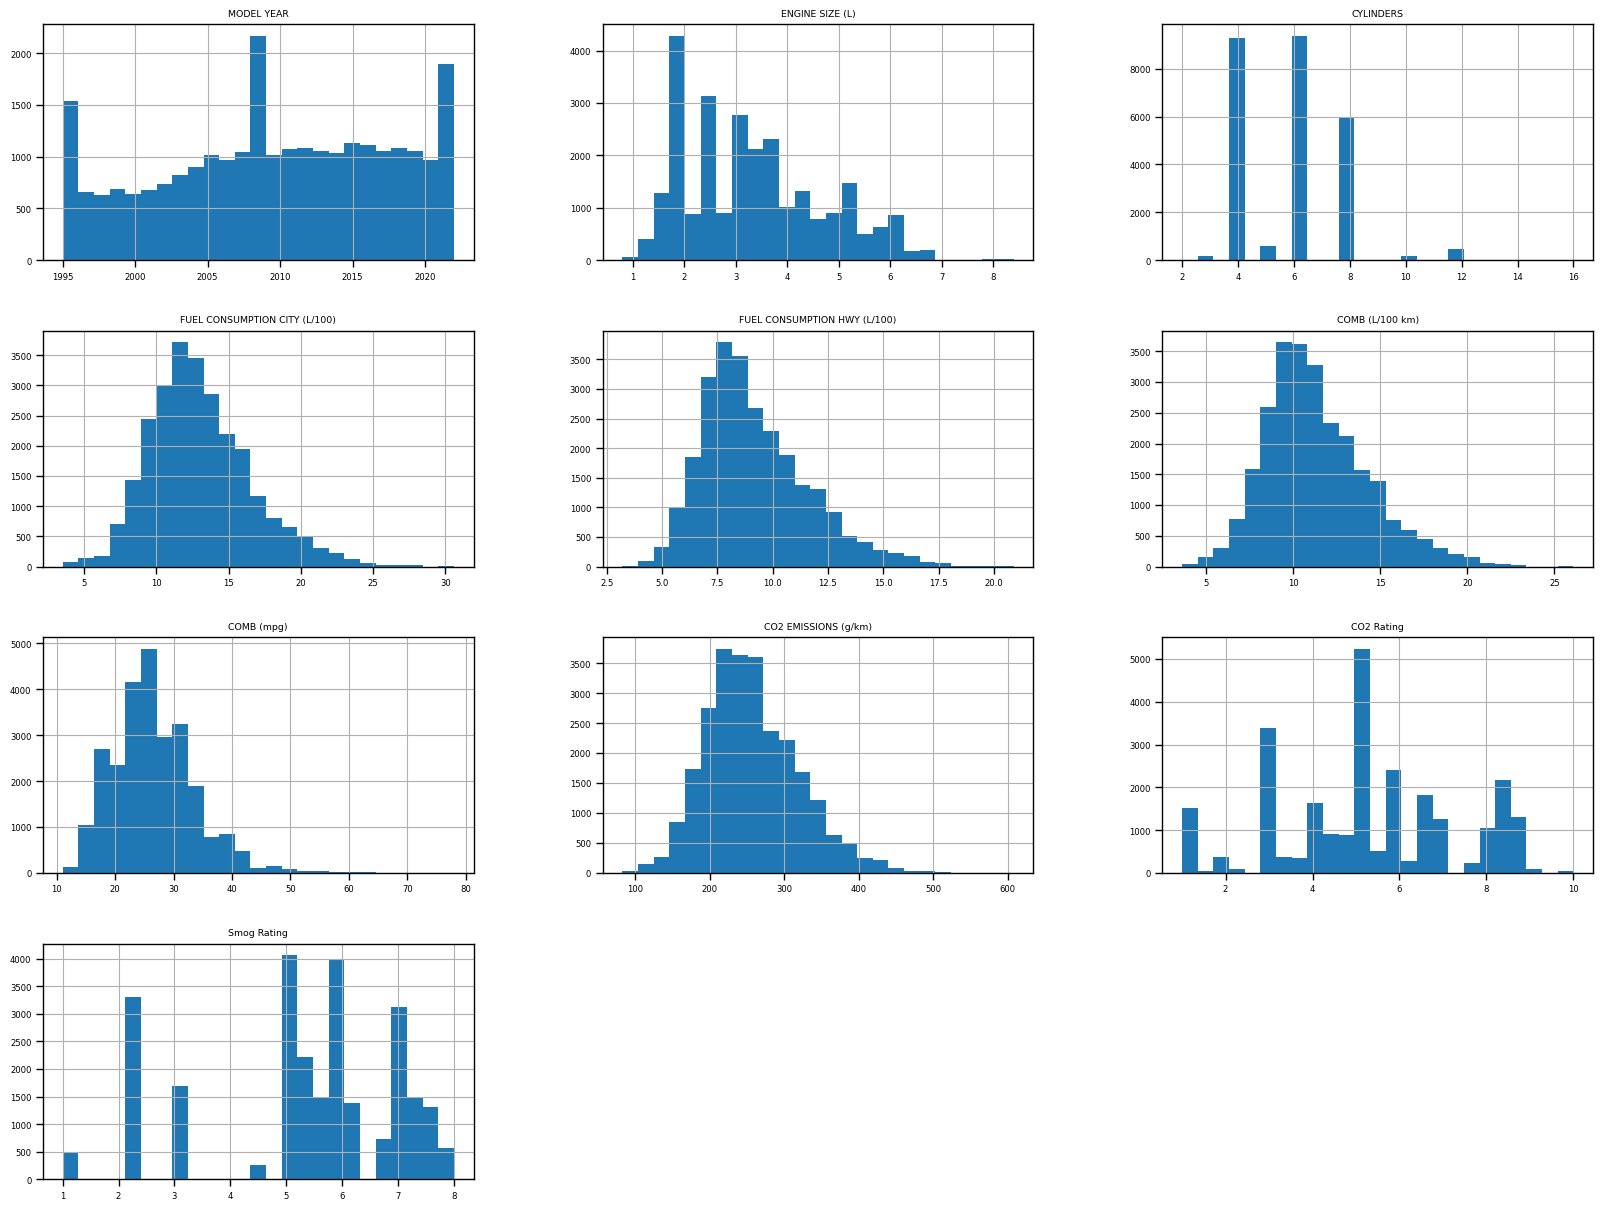

In [136]:
df.hist(bins=25, figsize=(20,15))
plt.show()

##### Engine Size (L) vs COMB (L/100 km)

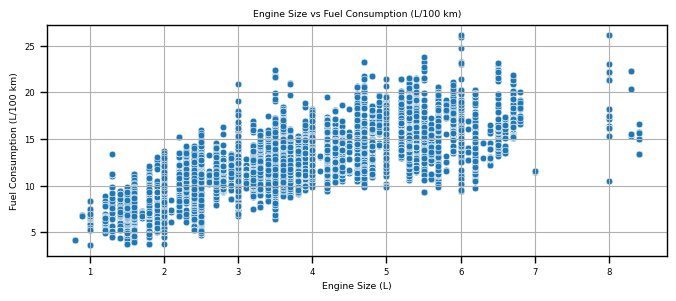

In [137]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=df, x='ENGINE SIZE (L)', y='COMB (L/100 km)')
plt.title('Engine Size vs Fuel Consumption (L/100 km)')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.grid(True)
plt.show()

##### Fuel type vs. COMB (L/100 km)

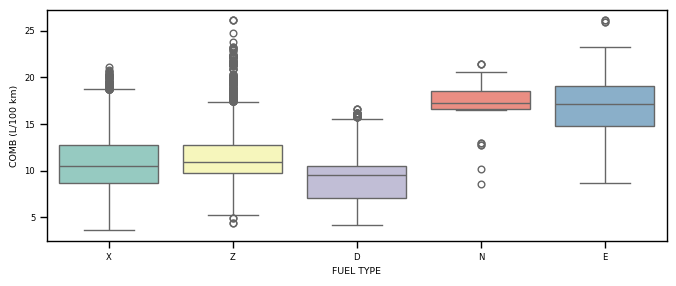

In [138]:
plt.figure(figsize = (8,3))
sns.boxplot(data = df, x = 'FUEL TYPE', y = 'COMB (L/100 km)', palette='Set3', hue='FUEL TYPE')
plt.show()

Transmission vs. COMB (L/100 km)

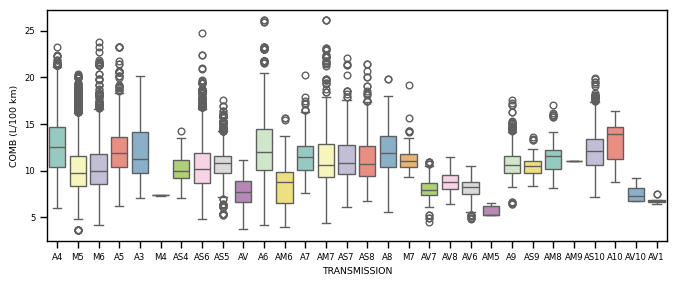

In [139]:
plt.figure(figsize = (8,3))
sns.boxplot(data = df, x = 'TRANSMISSION', y = 'COMB (L/100 km)', palette='Set3', hue='TRANSMISSION')
sns.set_context("paper", font_scale=0.7)
plt.show()

##### Vehicle Class vs. COMB (L/100 km)

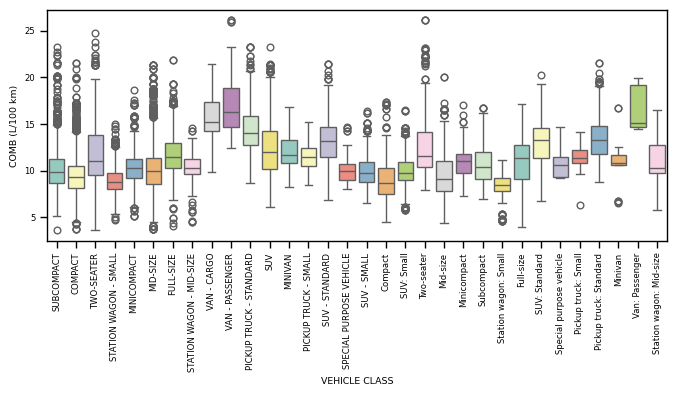

In [140]:
plt.figure(figsize = (8,3))
sns.boxplot(data = df, x = 'VEHICLE CLASS', y = 'COMB (L/100 km)', palette='Set3', hue='VEHICLE CLASS')
plt.xticks(rotation = 90)
plt.show()

#### Correlation

<Axes: >

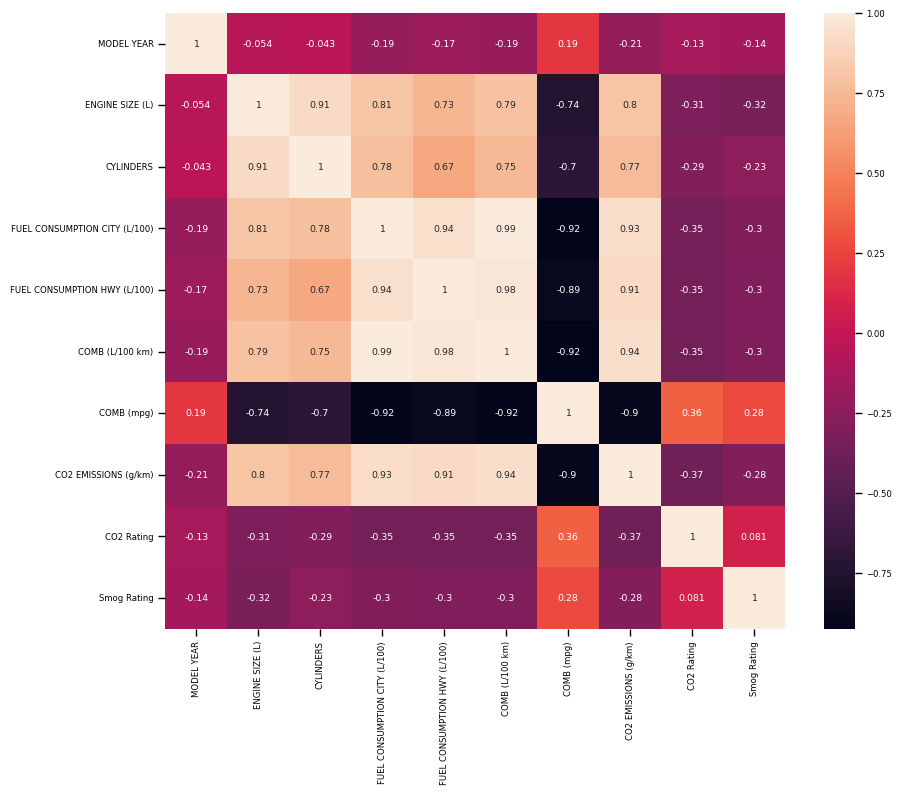

In [141]:
numerical_df = df.drop(columns=['MAKE','MODEL(# = high output engine)','VEHICLE CLASS', 'TRANSMISSION','FUEL TYPE'])
corr_matrix = numerical_df.corr()
corr_matrix["CO2 EMISSIONS (g/km)"].sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)

### Feature Engineering

Frequency encoding ['MAKE']

In [142]:
enc_make = df.groupby('MAKE').size()/len(df)
df['ENC_MAKE'] = df['MAKE'].apply(lambda x_make : enc_make[x_make])
df.drop(['MAKE'], axis=1, inplace=True)
df['ENC_MAKE'].head()

0    0.009588
1    0.009588
2    0.009588
3    0.009588
4    0.009588
Name: ENC_MAKE, dtype: float64

Frequency encoding ['MODEL']

In [143]:
enc_model = df.groupby('MODEL(# = high output engine)').size()/len(df)
df['ENC_MODEL'] = df['MODEL(# = high output engine)'].apply(lambda x_model : enc_model[x_model])
df.drop(['MODEL(# = high output engine)'], axis=1, inplace=True)
df['ENC_MODEL'].head()

0    0.000537
1    0.000537
2    0.000192
3    0.000038
4    0.000077
Name: ENC_MODEL, dtype: float64

One Hot Encoding ['FUEL TYPE'] ['VEHICLE CLASS'] ['TRANSMISSION']

In [144]:
one_hot_df = df[['FUEL TYPE', 'VEHICLE CLASS', 'TRANSMISSION']].copy()
one_hot_df.reset_index(inplace=True)
one_hot_df.drop(['index'], axis=1, inplace=True)
one_hot_df.head()

,FUEL TYPE,VEHICLE CLASS,TRANSMISSION
0,X,SUBCOMPACT,A4
1,X,SUBCOMPACT,M5
2,Z,SUBCOMPACT,M5
3,Z,COMPACT,A4
4,Z,COMPACT,A4


In [145]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_cat = pd.DataFrame(encoder.fit_transform(one_hot_df), columns=encoder.get_feature_names_out(one_hot_df.columns))
df_cat.head()

,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z,VEHICLE CLASS_Compact,VEHICLE CLASS_FULL-SIZE,VEHICLE CLASS_Full-size,VEHICLE CLASS_MID-SIZE,VEHICLE CLASS_MINICOMPACT,VEHICLE CLASS_MINIVAN,...,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
df = pd.concat([df,df_cat], axis=1)
df.drop(['VEHICLE CLASS','TRANSMISSION','FUEL TYPE'], axis =1, inplace = True)
df.dropna(inplace=True)
df.head()

,MODEL YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY (L/100),FUEL CONSUMPTION HWY (L/100),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km),CO2 Rating,Smog Rating,...,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
0,1995,1.8,4,11.6,8.3,10.1,28,232,6.2,6.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1995,1.8,4,11.0,8.3,9.8,29,225,6.2,6.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1995,1.8,4,10.8,8.3,9.7,29,223,6.2,6.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1995,3.2,6,14.2,10.5,12.5,23,288,6.2,6.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1995,3.2,6,14.6,11.0,13.0,22,299,6.2,6.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Droping columns not suitable for training
<ol>
<li>Model Year: This column has a low correlation value of -0.19, indicating weak linear relationship with the target variable or other features.</li>
<li>FUEL CONSUMPTION CITY (L/100): This column exhibits multicollinearity, meaning it is highly correlated with other predictor variables, which can lead to redundancy in the model.</li>
<li>FUEL CONSUMPTION HWY (L/100): Similar to the previous column, this one also shows multicollinearity, suggesting redundancy with other predictor variables.</li>
<li>COMB (mpg): This column is considered a duplicate.</li>
<li>CO2 Rating: This column has a low correlation value of -0.37 with the target variable or other features. </li>
<li>Smog Rating: Similar to the CO2 Rating, this column has a low correlation value of -0.28 , suggesting limited relevance to the analysis.</li>
</ol>

In [148]:
df.drop(['MODEL YEAR', 'FUEL CONSUMPTION CITY (L/100)', 'FUEL CONSUMPTION HWY (L/100)', 'COMB (mpg)', 'Smog Rating'], axis=1, inplace=True)
df.head()

,ENGINE SIZE (L),CYLINDERS,COMB (L/100 km),CO2 EMISSIONS (g/km),CO2 Rating,ENC_MAKE,ENC_MODEL,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,...,TRANSMISSION_AV,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7
0,1.8,4,10.1,232,6.2,0.009588,0.000537,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.8,4,9.8,225,6.2,0.009588,0.000537,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.8,4,9.7,223,6.2,0.009588,0.000192,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.2,6,12.5,288,6.2,0.009588,0.000038,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.2,6,13.0,299,6.2,0.009588,0.000077,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Regression Analysis

##### Pre-processing

In [149]:
df_emi = df[['COMB (L/100 km)']]
df.drop('COMB (L/100 km)', axis=1, inplace=True)
df = pd.concat([df, df_emi], axis=1)
df.head()

,ENGINE SIZE (L),CYLINDERS,CO2 EMISSIONS (g/km),CO2 Rating,ENC_MAKE,ENC_MODEL,FUEL TYPE_E,FUEL TYPE_N,FUEL TYPE_X,FUEL TYPE_Z,...,TRANSMISSION_AV1,TRANSMISSION_AV10,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,COMB (L/100 km)
0,1.8,4,232,6.2,0.009588,0.000537,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.1
1,1.8,4,225,6.2,0.009588,0.000537,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.8
2,1.8,4,223,6.2,0.009588,0.000192,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.7
3,3.2,6,288,6.2,0.009588,0.000038,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.5
4,3.2,6,299,6.2,0.009588,0.000077,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0


#### Seperating Features and Labels

In [150]:
X = df.iloc[:,:70].values
y = df.iloc[:,-1].values

#### Splitting the dataset into Training and Test set

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling

In [154]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20860, 70)
(20860,)
(5215, 70)
(5215,)


#### Creating and Training the Models

##### Linear Regression

In [158]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
with open('model_lr.pkl','wb') as f:
    pickle.dump(model_lr,f)

##### Random Forest

In [159]:
model_rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
model_rf.fit(X_train, y_train)
with open('model_rf.pkl','wb') as f:
    pickle.dump(model_rf,f)

##### Support Vector Regression

In [160]:
model_svr = SVR(kernel = 'rbf')
model_svr.fit(X_train, y_train)
with open('model_svr.pkl','wb') as f:
    pickle.dump(model_svr,f)

### Evaluation of the models

##### Linear Regression model

In [175]:
y_pred_lr = model_lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
print("\nR2 Score:", r2_lr)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("Mean Absolute Error (MAE):", mae_lr)
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)

from sklearn.model_selection import cross_val_score
cv_r2_lr = cross_val_score(estimator=model_lr, X=X_train, y=y_train, cv=10, scoring='r2')
print("\nCross-Validation R2 Score:")
print("Mean R2 Score:", cv_r2_lr.mean())
print("Standard Deviation:", cv_r2_lr.std())


R2 Score: 0.9957209602121571
Mean Absolute Error (MAE): 0.08220614967835205
Mean Squared Error (MSE): 0.03840444550133933
Root Mean Squared Error (RMSE): 0.19597052202139822

Cross-Validation R2 Score:
Mean R2 Score: 0.9956108528836876
Standard Deviation: 0.0005219184832237807


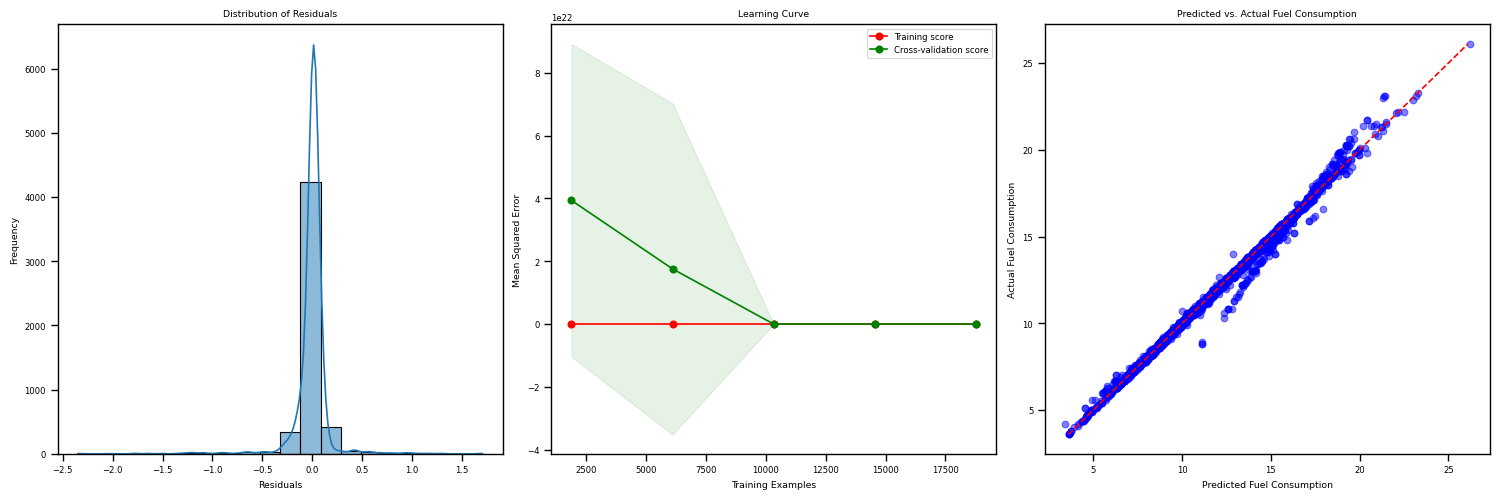

In [176]:
residuals = y_test - y_pred_lr
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.subplot(1, 3, 2)
train_sizes, train_scores, test_scores = learning_curve(model_lr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend(loc="best")

plt.subplot(1, 3, 3)
plt.scatter(y_pred_lr, y_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Predicted Fuel Consumption')
plt.ylabel('Actual Fuel Consumption')
plt.title('Predicted vs. Actual Fuel Consumption')

plt.tight_layout()
plt.show()

##### Random Forest Regression Model

In [179]:
y_pred_rf = model_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
print("\nR2 Score:", r2_rf)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)

from sklearn.model_selection import cross_val_score
cv_r2_rf = cross_val_score(estimator=model_rf, X=X_train, y=y_train, cv=10, scoring='r2')
print("\nCross-Validation R2 Score:")
print("Mean R2 Score:", cv_r2_rf.mean())
print("Standard Deviation:", cv_r2_rf.std())


R2 Score: 0.9978538768960524
Mean Absolute Error (MAE): 0.03457426836506668
Mean Squared Error (MSE): 0.01926148665849812
Root Mean Squared Error (RMSE): 0.13878575812560207

Cross-Validation R2 Score:
Mean R2 Score: 0.9977015359926721
Standard Deviation: 0.0007194005431070648


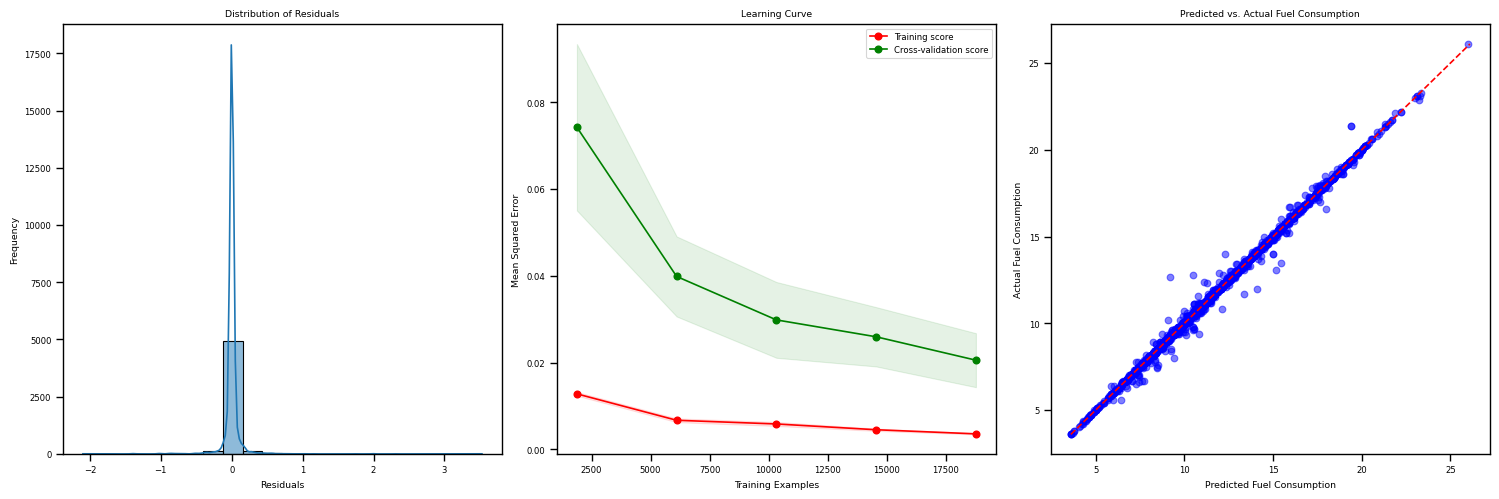

In [180]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.subplot(1, 3, 2)
train_sizes, train_scores, test_scores = learning_curve(model_rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend(loc="best")

plt.subplot(1, 3, 3)
plt.scatter(y_pred_rf, y_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Predicted Fuel Consumption')
plt.ylabel('Actual Fuel Consumption')
plt.title('Predicted vs. Actual Fuel Consumption')

plt.tight_layout()
plt.show()

##### Support Vector Regression Model

In [181]:
y_pred_svr = model_svr.predict(X_test)

r2_svr = r2_score(y_test, y_pred_svr)
print("\nR2 Score:", r2_svr)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
print("Mean Absolute Error (MAE):", mae_svr)
print("Mean Squared Error (MSE):", mse_svr)
print("Root Mean Squared Error (RMSE):", rmse_svr)

from sklearn.model_selection import cross_val_score
cv_r2_svr = cross_val_score(estimator=model_svr, X=X_train, y=y_train, cv=10, scoring='r2')
print("\nCross-Validation R2 Score:")
print("Mean R2 Score:", cv_r2_svr.mean())
print("Standard Deviation:", cv_r2_svr.std())


R2 Score: 0.9911184076289473
Mean Absolute Error (MAE): 0.13104308043802948
Mean Squared Error (MSE): 0.07971242313480488
Root Mean Squared Error (RMSE): 0.2823338859131239

Cross-Validation R2 Score:
Mean R2 Score: 0.9896142179232369
Standard Deviation: 0.0013693662355213475


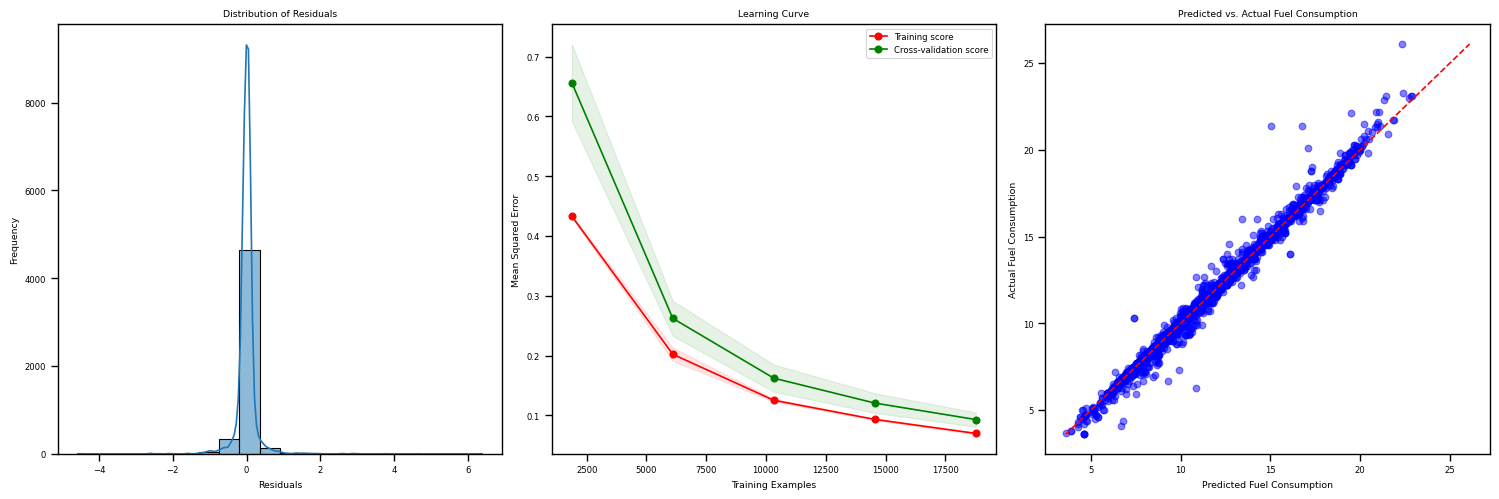

In [182]:
residuals = y_test - y_pred_svr
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.subplot(1, 3, 2)
train_sizes, train_scores, test_scores = learning_curve(model_svr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend(loc="best")

plt.subplot(1, 3, 3)
plt.scatter(y_pred_svr, y_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Predicted Fuel Consumption')
plt.ylabel('Actual Fuel Consumption')
plt.title('Predicted vs. Actual Fuel Consumption')

plt.tight_layout()
plt.show()